#### Libraries

In [9]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import random

#### Helper Functions

In [2]:
# Workaround to print images inside the Jupyter Notebook (cv.imshow method seems to be incompatible with Jupyter)
def display_img(image):
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [3]:
# Print images side to side for comparison inside the Jupyter Notebook
def display_img_comp(image_1, image_2, lab_1, lab_2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))   

    # Plot data on the first axis
    ax1.imshow(cv.cvtColor(image_1, cv.COLOR_BGR2RGB))
    ax1.set_title(lab_1)
    ax1.axis('off')

    # Plot data on the second axis
    ax2.imshow(cv.cvtColor(image_2, cv.COLOR_BGR2RGB))
    ax2.set_title(lab_2)
    ax2.axis('off')

    fig.tight_layout()
    plt.show()

In [4]:
# The whole pre-processing pipeline for a single image
def preprocess_image(img, width=500, height=500, clipLimit=1.0, tileGridSize=(8,8), resize=True):
    # Convert the image to 8-bit unsigned single channel (Gray Scale is required for CLAHE)
    img_p = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Apply CLAHE
    clahe = cv.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    img_p = clahe.apply(img_p)
    
    # Resize the image
    if(resize):
        img_p = cv.resize(img_p, (width, height))   
          
    return img_p

### Data Pre-Processing

In [17]:
# Parameters
width = 2500
height = 2500

# Input & Output Paths
img_paths_src_dict = {
    'training': r'data\Bone Age Datasets\Bone Age Training Set\boneage-training-dataset\boneage-training-dataset'
    , 'validation_1': r'data\Bone Age Datasets\Bone Age Validation Set\boneage-validation-dataset-1\boneage-validation-dataset-1'
    , 'validation_2': r'data\Bone Age Datasets\Bone Age Validation Set\boneage-validation-dataset-2\boneage-validation-dataset-2'
    , 'test': r'data\Bone Age Datasets\Bone Age Test Set\Test Set Images'
}

img_paths_dest_dict = {
    'training': r'data\pre_processed\training'
    , 'validation_1': r'data\pre_processed\validation\validation_1'
    , 'validation_2': r'data\pre_processed\validation\validation_2'
    , 'test': r'data\pre_processed\test'
}

# Get the relative paths for all images per split of the data
img_rel_paths_dict = {}
images = []

for split in img_paths_src_dict:
    dir = img_paths_src_dict[split]
    file_names = [f for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f))]
    relative_paths = [os.path.join(dir, f) for f in file_names]
    img_rel_paths_dict[split] = relative_paths

# Take % amount of samples of images from the training set to analyze
random.seed(642)
perc_samples = 0.25
n_samples = int(round(perc_samples*len(img_rel_paths_dict['training']), 0))
img_paths_analysis = random.sample(img_rel_paths_dict['training'], n_samples)

# Read the images, preprocess and put both the source and the pre-processed image into a dictionary 
for file in img_paths_analysis:
    img_src = cv.imread(file)
    img_p = preprocess_image(img_src, resize=False)
    images.append({'img_src': img_src, 'img_p': img_p})

# Write to file
# path = img_paths_dest_dict['training']

# for i in range(len(images)):
#     img = images[i]['img_p']
#     cv.imwrite('{0}\{1}.png'.format(path, i), img)

In [216]:
img_comp = images[190]
img = np.copy(img_comp['img_p'])

# First we convert do a binary threshold in the image to make contours more evident
_, img_thr = cv.threshold(img, 60, 100, cv.THRESH_BINARY)

# Gaussian Blur to smooth the image
img_blur = cv.GaussianBlur(img_thr, (33, 33), 20)

# Then we find the contours
contours, hierarchy = cv.findContours(img_blur, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
cv.drawContours(img, contours, -1, (0, 255, 0), 5)
# cv.drawContours(img, contours[hierarchy[0][0][2]], -1, (0,255,0), 5)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

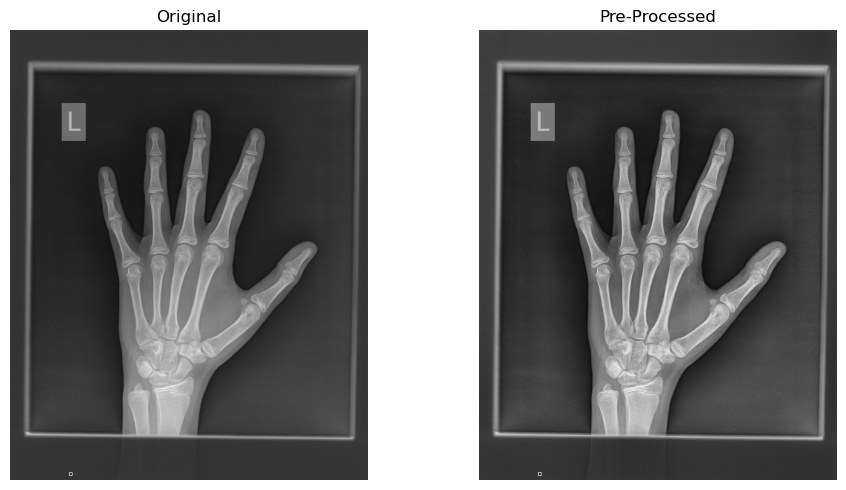

In [217]:
display_img_comp(img_comp['img_src'], img_comp['img_p'], 'Original', 'Pre-Processed')

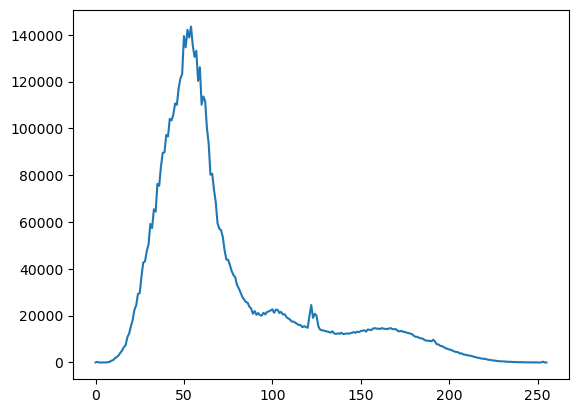

In [218]:
hist = cv.calcHist([img_comp['img_p']],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

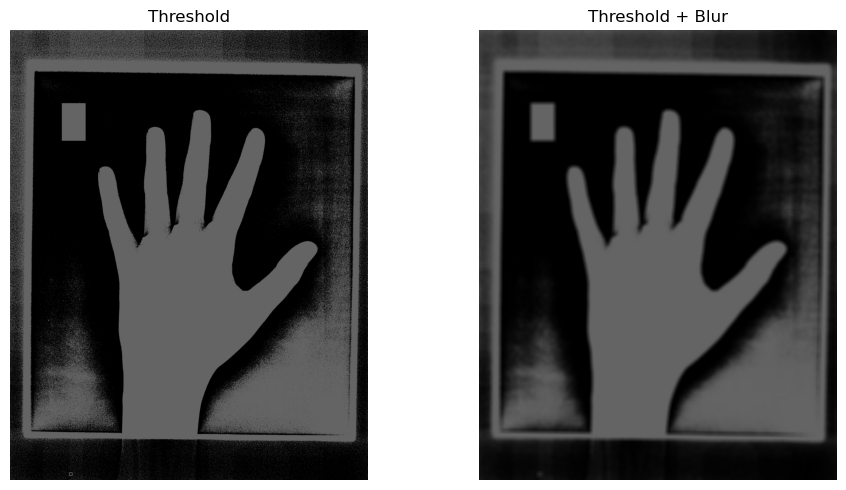

In [219]:
display_img_comp(img_thr, img_blur, 'Threshold', 'Threshold + Blur')

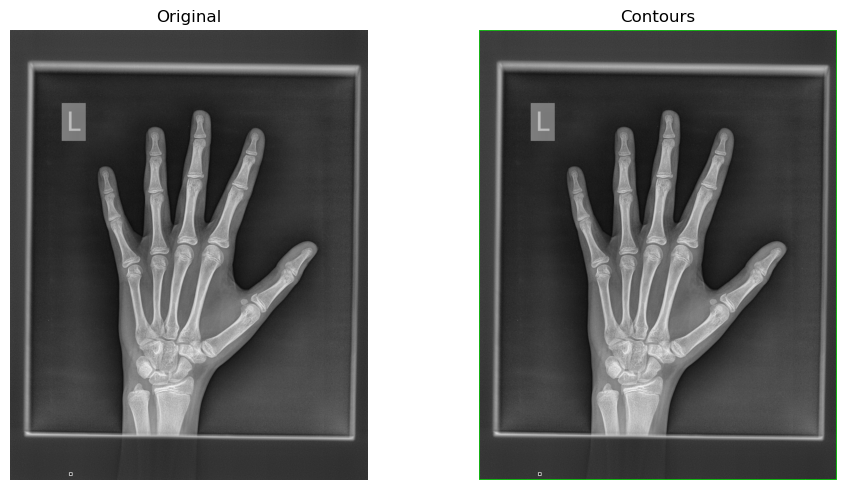

In [220]:
display_img_comp(img_comp['img_p'], img, 'Original', 'Contours')

In [ ]:
# Hola Mundo!

# Como fue el proyecto al final?
# [] Bien
# [] Mal
# [] Que buena pregunta